<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/Assignment_Random_Forest_CompanyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [ ]:
data=pd.read_csv("Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
data[data.duplicated()]  # No duplicated found in the data set

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


Converting Sales Non Categorical feature to categorical.

<ipython-input-11-71d7f883ce3a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Sales"])


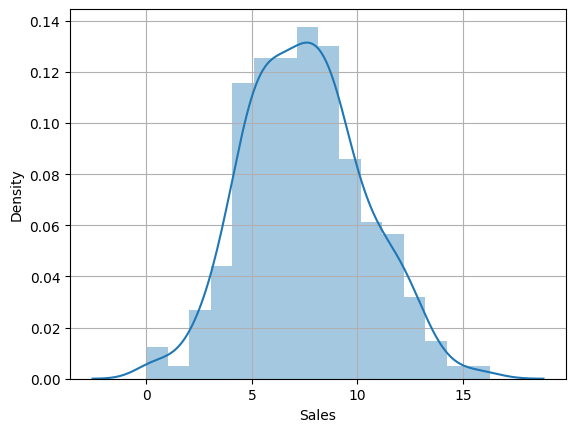

In [ ]:
# Plotting the sale
sns.distplot(data["Sales"])
plt.grid(True);

From the above graph we can see the sale is normally distributed hence we can divide sales in three categories i r low medium and high

In [ ]:
data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [ ]:
data["Sales_Cat"]= pd.cut(x = data['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [ ]:
data.Sales_Cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_Cat, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_Cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [ ]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data["Urban"]=encoder.fit_transform(data["Urban"])
data["US"]=encoder.fit_transform(data["US"])
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,9.50,138,73,11,276,120,3,42,17,1,1,High
1,11.22,111,48,16,260,83,1,65,10,1,1,High
2,10.06,113,35,10,269,80,2,59,12,1,1,High
3,7.40,117,100,4,466,97,2,55,14,1,1,Medium
4,4.15,141,64,3,340,128,3,38,13,1,0,Low


Finding Outliers:

<Axes: xlabel='US'>

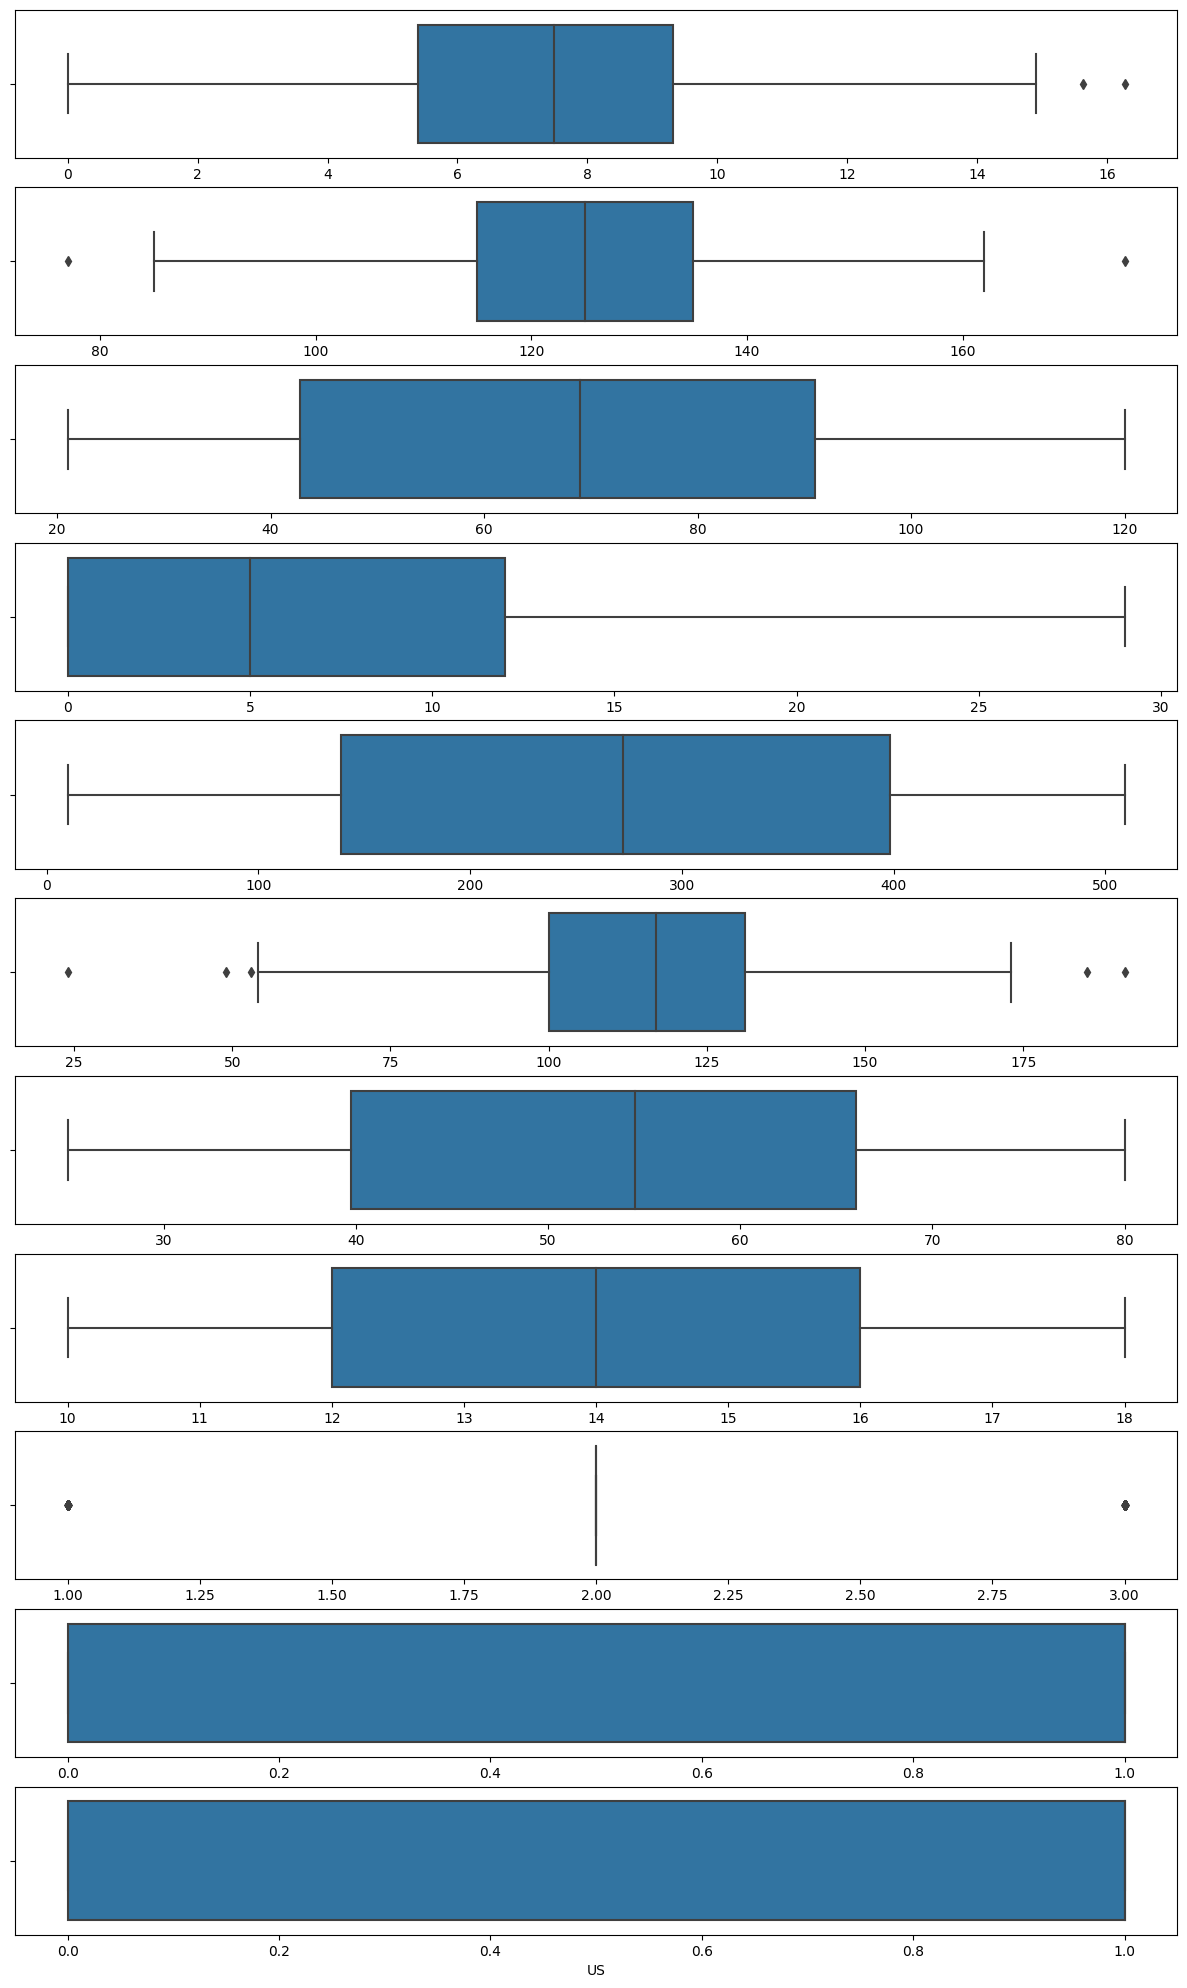

In [ ]:
fig,axes=plt.subplots(11,1,figsize=(15,25),sharex=False,sharey=False)
sns.boxplot(x="Sales",data=data,ax=axes[0])
sns.boxplot(x="CompPrice",data=data,ax=axes[1])
sns.boxplot(x="Income",data=data,ax=axes[2])
sns.boxplot(x="Advertising",data=data,ax=axes[3])
sns.boxplot(x="Population",data=data,ax=axes[4])
sns.boxplot(x="Price",data=data,ax=axes[5])
sns.boxplot(x="Age",data=data,ax=axes[6])
sns.boxplot(x="Education",data=data,ax=axes[7])
sns.boxplot(x="ShelveLoc",data=data,ax=axes[8])
sns.boxplot(x="Urban",data=data,ax=axes[9])
sns.boxplot(x="US",data=data,ax=axes[10])


In [ ]:
corr=data.corr()
corr

<ipython-input-19-0d3ae1d0be10>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.554458,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.038549,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,0.053465,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.056552,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,0.020614,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.050924,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,-0.554458,-0.038549,0.053465,-0.056552,0.020614,-0.050924,1.000000,-0.014149,0.025723,0.075404,-0.047378
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,-0.014149,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.025723,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,0.075404,0.028479,-0.033094,1.000000,0.047085


<Axes: >

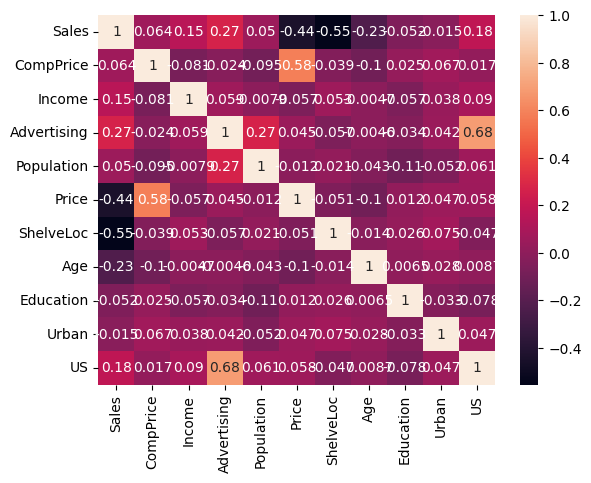

In [ ]:
sns.heatmap(corr,annot=True)

Plottingt he correlation of all variables with sales

<ipython-input-21-f7e24664c674>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corrwith(data.Sales)


Text(0.5, 1.0, 'Correlation with Sales \n')

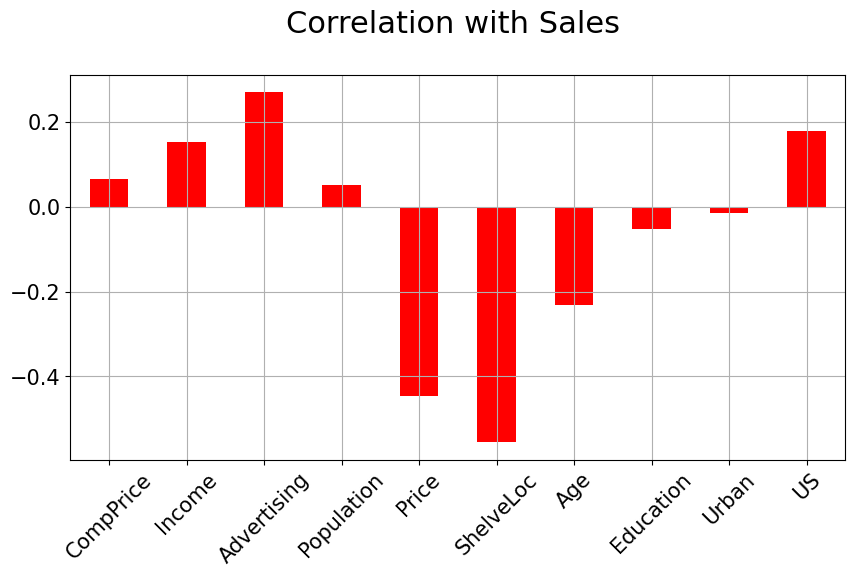

In [ ]:
correlation=data.corrwith(data.Sales)
correlation=correlation[correlation!=1]
positive_correlations = correlation[correlation >0].sort_values(ascending = False)
negative_correlations =correlation[correlation<0].sort_values(ascending = False)

correlation.plot.bar(
        figsize = (10, 5),
        fontsize = 15,
        color = 'red',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

In [ ]:
data=data.drop("Sales",axis=1)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,3,42,17,1,1,High
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,High
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,3,38,13,1,0,Low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,High
396,139,23,3,37,120,2,55,11,0,1,Medium
397,162,26,12,368,159,2,40,18,1,1,Medium
398,100,79,7,284,95,3,50,12,1,1,Medium


In [ ]:
data.Sales_Cat=encoder.fit_transform(data.Sales_Cat)

In [ ]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Cat
0,138,73,11,276,120,3,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,3,38,13,1,0,1


In [ ]:
x=data.iloc[:,:-1]
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,3,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,3,38,13,1,0


In [ ]:
y=data.Sales_Cat
y.value_counts()

2    198
0    102
1    100
Name: Sales_Cat, dtype: int64

#Model Building using Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

0.725


#Optimizing using grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
gmodel=RandomForestClassifier()
param_grid=({'n_estimators':[100,200,300],'criterion':['gini','entropy'],'max_depth':range(2,20),'max_leaf_nodes':range(2,20)})
grid=GridSearchCV(gmodel,param_grid)
grid.fit(x,y)
print(grid.best_score_)
print(grid.best_params_)

0.69
{'criterion': 'entropy', 'max_depth': 11, 'max_leaf_nodes': 18, 'n_estimators': 200}


In [ ]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 11,max_leaf_nodes=18,n_estimators=200)
modelb.fit(x,y)
pred=modelb.predict(x)
print(np.mean(y==pred))

0.85


In [ ]:
modelb=RandomForestClassifier(criterion='entropy',max_depth= 11,max_leaf_nodes=18,n_estimators=200)
modelb.fit(x_train,y_train)
pred=modelb.predict(x_train)
print(np.mean(y_train==pred))

0.871875


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

0.66


#Bagging

In [ ]:
modelb1=RandomForestClassifier(n_estimators=200,criterion='entropy',max_leaf_nodes=18,max_depth=11)
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.6425


#Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

0.6525000000000001


#Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
estimators=[]
model1=LogisticRegression(max_iter=500,solver='liblinear')
estimators.append(('logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('cart',model2))
model3=SVC()
estimators.append(('svm',model3))
model4=AdaBoostClassifier(base_estimator=modelb1)
estimators.append(('adaboost',model4))
model5=BaggingClassifier(base_estimator=modelb1)
estimators.append(('bagging',model5))
model6=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)
estimators.append(('RandomForest',model6))

ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
print(results)
print(results.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

[0.65  0.75  0.65  0.725 0.65  0.7   0.675 0.675 0.7   0.675]
0.6849999999999999


XGBM

In [ ]:
from tqdm.notebook import tqdm, trange
import time
# First XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]
y_pred

array([1, 1, 0, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0,
       0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 2,
       2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2])

In [ ]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.75%


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_train, predictions1)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


LGBM

In [ ]:
import lightgbm as lgb
d_train = lgb.Dataset(x_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 11
params['min_data'] = 50
params['max_depth'] = 18
clf = lgb.train(params, d_train, 100)

[LightGBM] [Info] Number of positive: 241, number of negative: 79
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.097332 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.753125 -> initscore=1.115349
[LightGBM] [Info] Start training from score 1.115349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [ ]:
#Prediction
y_pred=clf.predict(x_test)

In [ ]:
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
accuracy

0.2125